<a href="https://colab.research.google.com/github/iharshmgoyal/NYC_311_Service_Request_Analysis/blob/main/nyc_311_service_request_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# <center>NYC 311 Service Request Analysis

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.simplefilter("ignore")

## Sol - 1:  Import a 311 NYC service request.

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebook SimpliLean Projects/data/Data.csv', low_memory=False, parse_dates=["Created Date", "Closed Date"])
data.replace('Unspecified',np.NaN,inplace=True)

In [3]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-2016 07:59,The Police Department responded and upon arriv...,01-01-2016 00:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,NaN,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-2016 07:59,The Police Department responded to the complai...,01-01-2016 01:26,01 QUEENS,QUEENS,1007766.0,221986.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-2016 07:59,The Police Department responded and upon arriv...,01-01-2016 04:51,07 BRONX,BRONX,1015081.0,256380.0,NaN,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-2016 07:57,The Police Department responded to the complai...,01-01-2016 07:43,10 BRONX,BRONX,1031740.0,243899.0,NaN,BRONX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-2016 07:56,The Police Department responded and upon arriv...,01-01-2016 03:24,04 QUEENS,QUEENS,1019123.0,206375.0,NaN,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


## Basic info about Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [5]:
data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

### Sorted Number of Complaints respective to Complaint Type

In [6]:
Complaint = pd.DataFrame(data['Unique Key'].groupby(data['Complaint Type']).count().sort_values(ascending=False))
Complaint

,Unique Key
Complaint Type,
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416


Complaint Types with counts


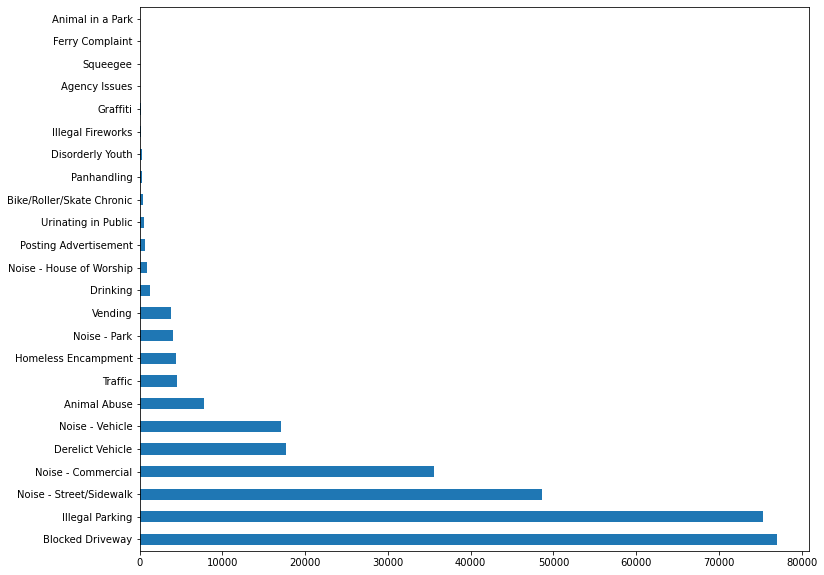

In [7]:
plt.figure(figsize=(12,10)) 
print("Complaint Types with counts")
data['Complaint Type'].value_counts().plot(kind='barh')

### Sorted Number of Complaints respective to City

In [8]:
complaints_in_city = pd.DataFrame(data['Complaint Type'].groupby(data['City']).count().sort_values(ascending=False))
complaints_in_city

,Complaint Type
City,
BROOKLYN,98307
NEW YORK,65994
BRONX,40702
STATEN ISLAND,12343
JAMAICA,7296
ASTORIA,6330
FLUSHING,5971
RIDGEWOOD,5163
CORONA,4295


## Details about City -> Complaint Type -> Descriptor -> Number of Complaints

In [9]:
pd.DataFrame(data.groupby(['City', 'Complaint Type', 'Descriptor'])['Unique Key'].count())

Unique Key
City                Complaint Type           Descriptor                                
ARVERNE             Animal Abuse             Chained                                  3
                                             Neglected                               12
                                             Other (complaint details)               13
                                             Tortured                                10
                    Blocked Driveway         No Access                               23
                                             Partial Access                          12
                    Derelict Vehicle         With License Plate                      27
                    Disorderly Youth         Playing in Unsuitable Place              2
                    Drinking                 Underage - Licensed Est                  1
                    Graffiti                 Police Report Requested                  1
                    Illegal Parking          Blocked Hydrant                         13
                                             Blocked Sidewalk                         4
                                             Commercial Overnight Parking            17
                                             Double Parked Blocking Traffic           1
                                             Double Parked Blocking Vehicle           1
                                             Overnight Commercial Storage             5
                                             Posted Parking Sign Violation           14
                                             Unauthorized Bus Layover                 3
                    Noise - Commercial       Car/Truck Horn                           1
                                             Loud Talking                             1
                    Noise - House of Worship Loud Music/Party                        10
                                             Loud Talking                             1
                    Noise - Park             Loud Talking                             2
                    Noise - Street/Sidewalk  Loud Music/Party                        19
                                             Loud Talking                            10
                    Noise - Vehicle          Car/Truck Horn                           2
                                             Car/Truck Music                          4
                                             Engine Idling                            1
                    Vending                  Unlicensed                               1
ASTORIA             Animal Abuse             Chained                                 16
                                             In Car                                   9
                                             Neglected                               66
                                             No Shelter                               1
                                             Other (complaint details)               24
                                             Tortured                                 9
                    Blocked Driveway         No Access                             1988
                                             Partial Access                         630
                    Derelict Vehicle         With License Plate                     351
                    Disorderly Youth         Playing in Unsuitable Place              3
                    Drinking                 After Hours - Licensed Est               2
                                             In Public                               23
                                             Underage - Licensed Est                 10
                    Graffiti                 Police Report Requested                  4
                    Illegal Parking          Blocked Hydrant                        196
                             

In [10]:
data['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', nan, 'STATEN ISLAND'],
      dtype=object)

## Details about Borough -> Complaint Type -> Descriptor -> Number of Complaints

In [11]:
pd.DataFrame(data.groupby(['Borough','Complaint Type','Descriptor'])['Unique Key'].count().sort_values(ascending=False))

Unique Key
Borough       Complaint Type           Descriptor                                
QUEENS        Blocked Driveway         No Access                            22552
BROOKLYN      Blocked Driveway         No Access                            21422
MANHATTAN     Noise - Street/Sidewalk  Loud Music/Party                     13790
              Noise - Commercial       Loud Music/Party                     10669
BRONX         Blocked Driveway         No Access                             9884
QUEENS        Blocked Driveway         Partial Access                        9092
BROOKLYN      Noise - Street/Sidewalk  Loud Music/Party                      8586
              Noise - Commercial       Loud Music/Party                      8322
QUEENS        Derelict Vehicle         With License Plate                    8110
BROOKLYN      Illegal Parking          Posted Parking Sign Violation         7696
MANHATTAN     Noise - Street/Sidewalk  Loud Talking                          6760
BROOKLYN      Blocked Driveway         Partial Access                        6726
              Illegal Parking          Blocked Hydrant                       6697
BRONX         Noise - Street/Sidewalk  Loud Music/Party                      6173
QUEENS        Illegal Parking          Posted Parking Sign Violation         5867
                                       Blocked Hydrant                       5230
BROOKLYN      Derelict Vehicle         With License Plate                    5181
MANHATTAN     Illegal Parking          Posted Parking Sign Violation         4933
BROOKLYN      Noise - Street/Sidewalk  Loud Talking                          4769
QUEENS        Illegal Parking          Commercial Overnight Parking          4646
              Noise - Commercial       Loud Music/Party                      4557
BROOKLYN      Illegal Parking          Commercial Overnight Parking          4346
                                       Blocked Sidewalk                      4017
QUEENS        Illegal Parking          Blocked Sidewalk                      3486
BROOKLYN      Noise - Vehicle          Car/Truck Music                       3127
BRONX         Noise - Vehicle          Car/Truck Music                       2881
              Blocked Driveway         Partial Access                        2871
MANHATTAN     Noise - Vehicle          Car/Truck Music                       2862
BRONX         Noise - Street/Sidewalk  Loud Talking                          2718
QUEENS        Noise - Street/Sidewalk  Loud Music/Party                      2613
BRONX         Illegal Parking          Posted Parking Sign Violation         2342
BROOKLYN      Illegal Parking          Double Parked Blocking Traffic        1958
BRONX         Derelict Vehicle         With License Plate                    1953
QUEENS        Noise - Street/Sidewalk  Loud Talking                          1794
STATEN ISLAND Derelict Vehicle         With License Plate                    1766
MANHATTAN     Illegal Parking          Blocked Hydrant                       1701
                                       Double Parked Blocking Traffic        1624
              Blocked Driveway         No Access                             1588
              Noise - Commercial       Loud Talking                          1564
BROOKLYN      Illegal Parking          Double Parked Blocking Vehicle        1564
MANHATTAN     Vending                  In Prohibited Area                    1526
              Illegal Parking          Blocked Sidewalk                      1520
BRONX         Noise - Commercial       Loud Music/Party                      1490
MANHATTAN     Noise - Commercial       Banging/Pounding                      1481
              Noise - Vehicle          Engine Idling                         1456
BRONX         Illegal Parking          Blocked Hydrant                       1413
BROOKLYN      Noise - Commercial       Banging/Pounding                      1409
              Noise - Vehicle          Engine Idling 

- Make a list of columns which contains null values or irrlevate data.
- Its safe to drop these columns.
- We will retain 'Agency' column, hence 'Agency Name' will be dropped as both have similar values.
- Facility Type has only 'Precinct' value, hence not relevant.
- Column 'Due Date' and 'Resolution Action Updated Date' are not relevant to the analysis.

In [12]:
remove_columns= ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

- Drop above defined columns.
- As most of the requests are 'Closed', hence our analysis will include only 'Closed' requests and we will drop other records.
- Then we will drop the 'Status' column.
- Selecting not null values of 'Latitude', 'Longitude' and 'Descriptor' column values will furthere remove empty values.

In [13]:
data.drop(remove_columns, inplace=True, axis=1)
data = data[data['Status']=='Closed']
data.drop(['Status'],inplace=True, axis=1)
data = data[(data['Latitude'].notnull())& (data['Longitude'].notnull()) & (data['Descriptor'].notnull())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              291204 non-null  int64         
 1   Created Date            291204 non-null  datetime64[ns]
 2   Closed Date             291204 non-null  datetime64[ns]
 3   Agency                  291204 non-null  object        
 4   Complaint Type          291204 non-null  object        
 5   Descriptor              291204 non-null  object        
 6   Location Type           291149 non-null  object        
 7   Incident Zip            291164 non-null  float64       
 8   City                    291164 non-null  object        
 9   Resolution Description  291204 non-null  object        
 10  Borough                 291204 non-null  object        
 11  Latitude                291204 non-null  float64       
 12  Longitude               291204

In [14]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


In [15]:
data['City'].value_counts().sort_values(ascending=False)

BROOKLYN               96881
NEW YORK               61940
BRONX                  40223
STATEN ISLAND          12214
JAMAICA                 7155
ASTORIA                 6254
FLUSHING                5919
RIDGEWOOD               5124
CORONA                  4266
WOODSIDE                3494
SOUTH RICHMOND HILL     2759
OZONE PARK              2735
EAST ELMHURST           2725
ELMHURST                2624
WOODHAVEN               2449
MASPETH                 2445
LONG ISLAND CITY        2409
SOUTH OZONE PARK        2165
FRESH MEADOWS           1886
RICHMOND HILL           1865
QUEENS VILLAGE          1788
MIDDLE VILLAGE          1759
JACKSON HEIGHTS         1671
FOREST HILLS            1655
REGO PARK               1477
COLLEGE POINT           1217
BAYSIDE                 1215
FAR ROCKAWAY            1163
WHITESTONE              1093
HOLLIS                  1001
HOWARD BEACH             922
ROSEDALE                 913
SPRINGFIELD GARDENS      871
SAINT ALBANS             825
KEW GARDENS   

In [16]:
data.nunique()

Unique Key                291204
Created Date              252057
Closed Date               232076
Agency                         1
Complaint Type                15
Descriptor                    41
Location Type                 14
Incident Zip                 200
City                          53
Resolution Description        12
Borough                        5
Latitude                  123042
Longitude                 123141
dtype: int64

- Above count shows that a lot of columns have same or very few deifferent records, hence we will convert them to Categorical data.
- Date Values will be converted to DateTime objects.
- Date values should not be converted to categories.
- We will also make sure that Column 'Created Date' and 'Closed Date' do not have any null values remaining.
- We will create a new TimeDelta Columns as 'Request_Closing_Time' which will be the difference of 'Closed Date' and 'Created Date'.

## Sol-2:  Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [17]:
exclude_columns = ['Created Date','Closed Date']

for col in exclude_columns:
    data[col] = pd.to_datetime(data[col],format='%m/%d/%Y %I:%M:%S %p')
    
for col in data.columns:
    if data[col].nunique() < 300 and col not in exclude_columns:
        data[col] = data[col].astype('category')
        

data.dropna(subset=['Created Date','Closed Date','City'], inplace=True)
data['Request_Closing_Time'] = data['Closed Date'] - data['Created Date']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291164 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291164 non-null  int64          
 1   Created Date            291164 non-null  datetime64[ns] 
 2   Closed Date             291164 non-null  datetime64[ns] 
 3   Agency                  291164 non-null  category       
 4   Complaint Type          291164 non-null  category       
 5   Descriptor              291164 non-null  category       
 6   Location Type           291109 non-null  category       
 7   Incident Zip            291162 non-null  category       
 8   City                    291164 non-null  category       
 9   Resolution Description  291164 non-null  category       
 10  Borough                 291164 non-null  category       
 11  Latitude                291164 non-null  float64        
 12  Longitude       

## Sol-3:  Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [19]:
print('Start from : ',min(data['Created Date']))
print('Till : ',max(data['Created Date']))

Start from :  2015-03-29 00:33:01
Till :  2015-12-31 23:59:45


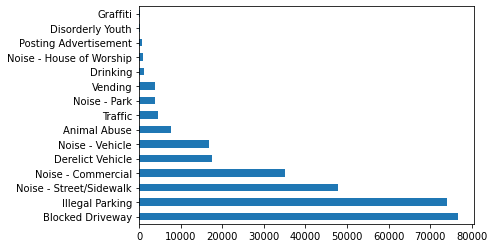

In [20]:
data['Complaint Type'].value_counts().plot(kind='barh')

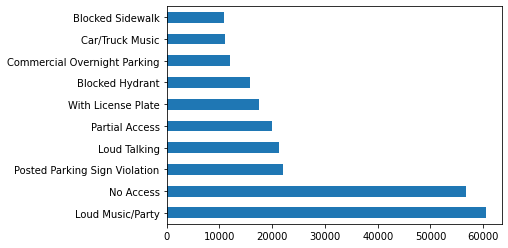

In [21]:
data['Descriptor'].value_counts()[:10].plot(kind='barh')

## Lets now plot top 6 of the highest complaint types with respect to Boroughs.

In [22]:
top_complaints = ['Blocked Driveway','Illegal Parking','Noise - Commercial','Noise - Street/Sidewalk','Derelict Vehicle','Animal Abuse']
comp_borough = data.groupby(['Borough','Complaint Type']).size().unstack()
comp_borough = comp_borough[top_complaints]
comp_borough

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk,Derelict Vehicle,Animal Abuse
Borough,,,,,,
BRONX,12741,7831,2431,8864,1949,1413
BROOKLYN,28128,27394,11452,13316,5167,2390
MANHATTAN,2056,11981,14530,20362,530,1511
QUEENS,31630,21950,6058,4391,8102,1874
STATEN ISLAND,2141,4883,677,815,1763,557


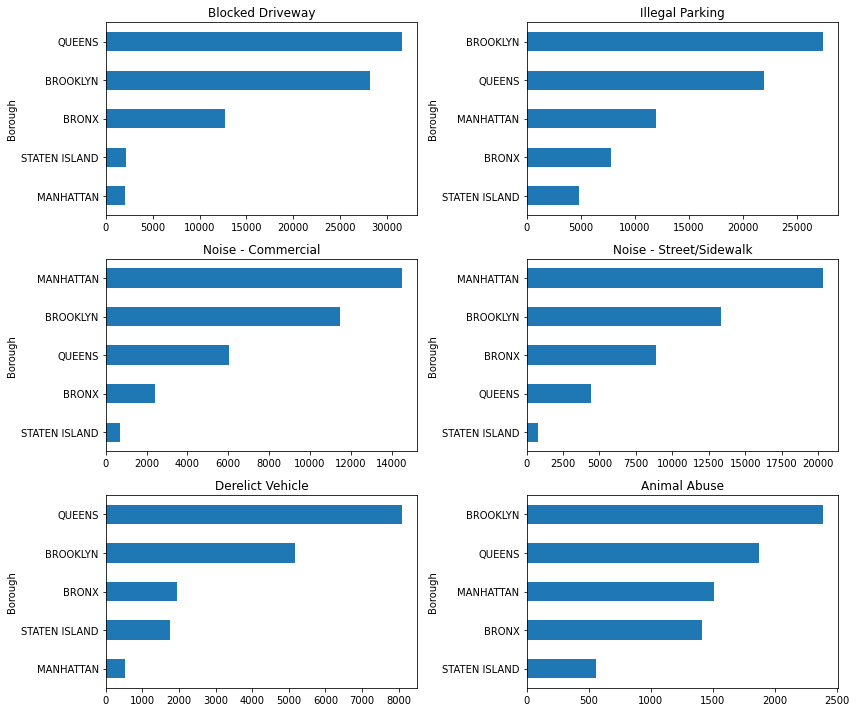

In [23]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,10))

for i, (label,col) in enumerate(comp_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

- Clearly Manhattan is making most of the noise, followed by Brooklyn.
- Brooklyn has the most number of 'Illegal parking' complaints and is also on the top for 'Animal Abuse'. (Savages!)
- Queens has highest complaints for 'Blocked Driveway' as well as for 'Derelict Vehicle'.

### Lets now breakdown the complaints for each Borough

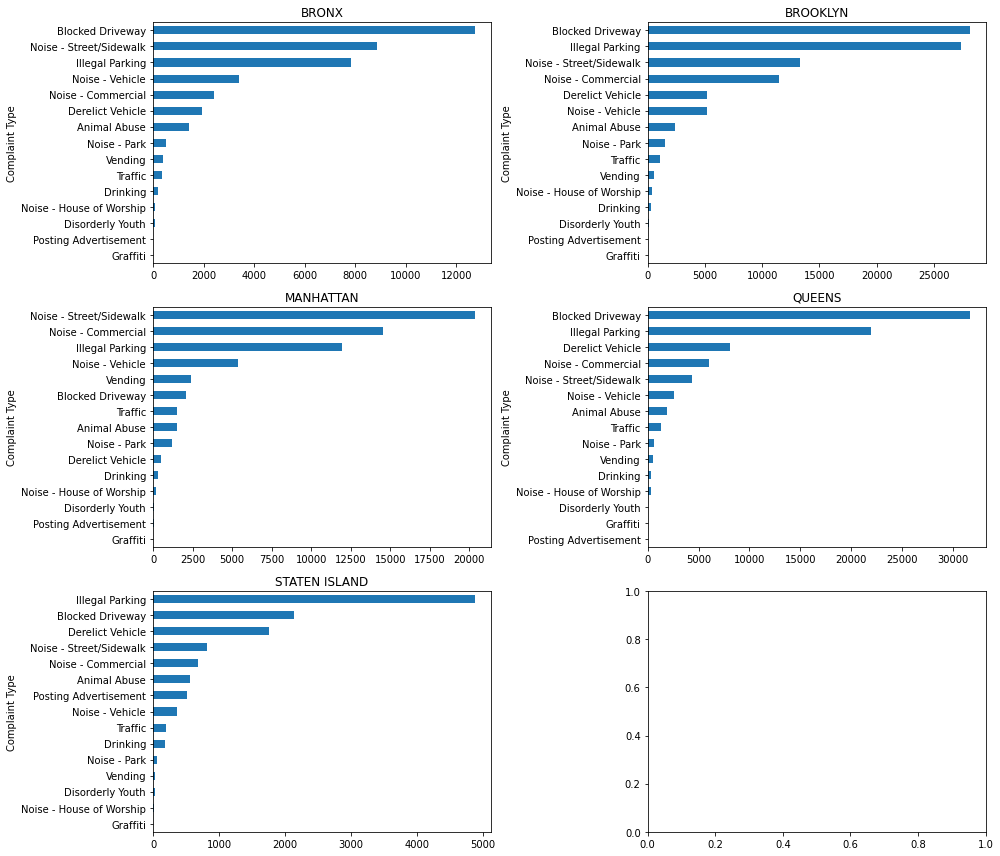

In [24]:
borough_comp = data.groupby(['Complaint Type','Borough']).size().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(14,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

- Apart from Manhattan, number of Complaints for 'Blocked Driveway' and 'Illegal Parking' is highest for each Borough.
- Manhattan has highest number of Noise complaints. Fortunaltely, parking in Manhattan is better than other Boroughs.

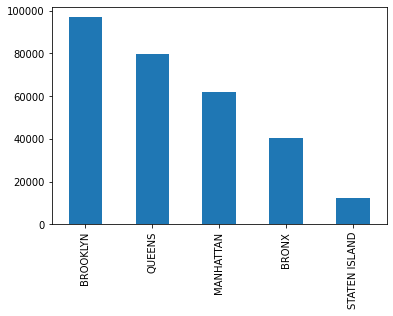

In [25]:
data['Borough'].value_counts().plot(kind='bar')

- Borough wise, Brooklyn has the most number of Complaints followed by Queens and Manhattan.

- Lets plot a treemap of top 10 cities for highest number of complaints.

In [26]:
data['Request_Closing_Time'].describe()

count                       291164
mean     0 days 04:18:31.308657663
std      0 days 06:03:43.742847273
min                0 days 00:01:00
25%                0 days 01:16:30
50%                0 days 02:42:38
75%                0 days 05:20:23
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object

- First we will convert our Request_Closing_Time from days to number of hours.
- Since, converting 2:30 hours to timedelta64[h] will give 2 hours, hence we will add 1 and will say that this particular request was closed within 3 hours.
- Then we will find out the mean and standard distribution of the data.

In [27]:
data['Request_Closing_Hours'] = data['Request_Closing_Time'].astype('timedelta64[h]')+1
data[['Request_Closing_Time','Request_Closing_Hours']].head()

,Request_Closing_Time,Request_Closing_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0


In [28]:
mean = data['Request_Closing_Hours'].mean()
std = data['Request_Closing_Hours'].std()

print('Mean: ',mean)
print('Std: ',std)

Mean:  4.818466568669203
Std:  6.063935739044802


In [29]:
data['Request_Closing_Hours'].sort_values().tail()

12167     224.0
12168     224.0
21268     520.0
23664     578.0
244488    593.0
Name: Request_Closing_Hours, dtype: float64

- As we can see, some of the closing times are too high and hence will be dealt as outliers.
- We will convert the Request Closing time to normal z statistics and will remove any record having value more than 1.
- z-statistic  = (value-mean)/std
- Next we will plot the histogram of our Request_Closing_Time.

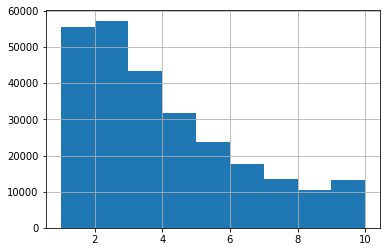

In [30]:
plot_data = data[ ((data['Request_Closing_Hours']-mean)/std) < 1]
plot_data['Request_Closing_Hours'].hist(bins=9)

## Sol-4:  Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

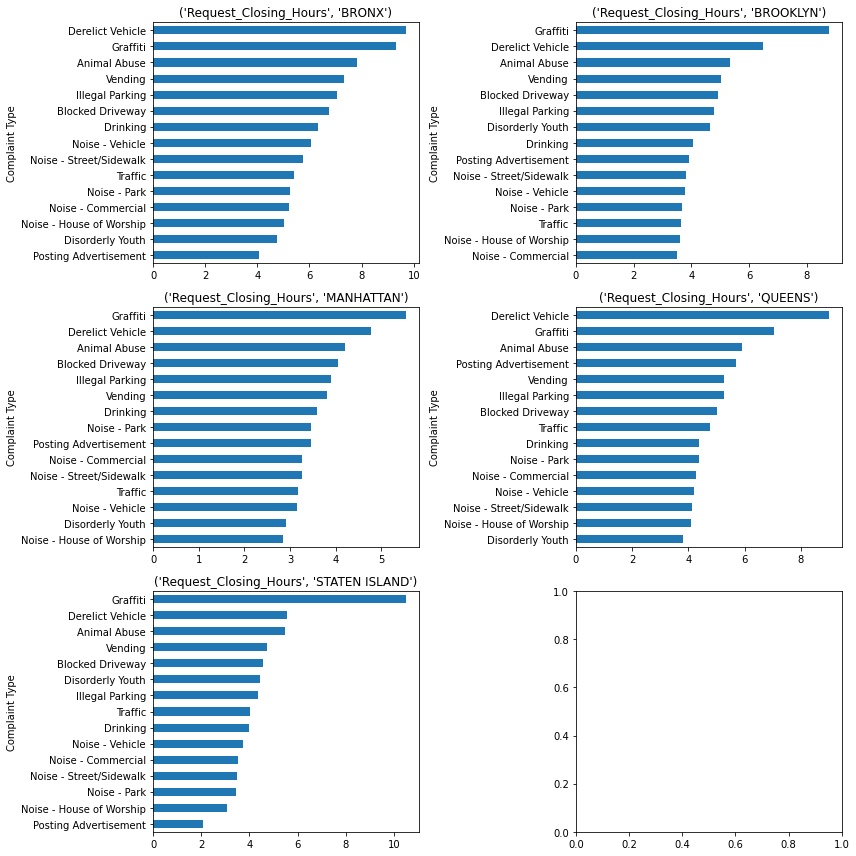

In [31]:
citywise_resolution = data.groupby(['Complaint Type','Borough'])[['Request_Closing_Hours']].mean().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(citywise_resolution.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

- Clealry 'Graffiti' complaints are taking a long time to be closed. Could be because the number of Graffiti complaints are very less and officials are focused on more pressing issues.
- Manhattan, Bronx and Queens are handling 'Disorderly Youth' complaints very well.
- Brooklyn is performing well to close Noise and traffic complaints.

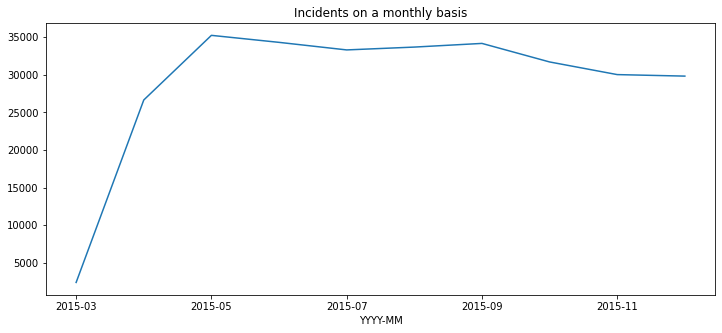

In [32]:
data['YYYY-MM'] = data['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))

#Incidents on a monthly basis
monthly_incidents =  data.groupby('YYYY-MM').size().plot(figsize=(12,5), title='Incidents on a monthly basis');

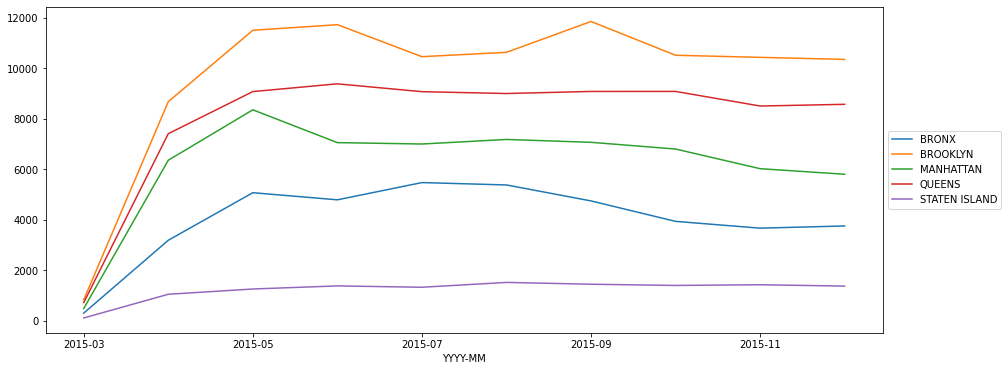

In [33]:
# Complaints per Borough through the year
data.groupby(['YYYY-MM','Borough']).size().unstack().plot(figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

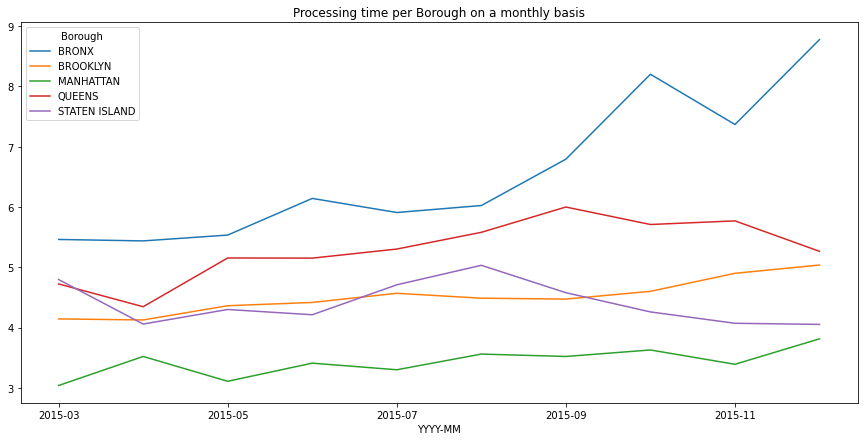

In [34]:
data.groupby(['YYYY-MM','Borough'])['Request_Closing_Hours'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Processing time per Borough on a monthly basis')

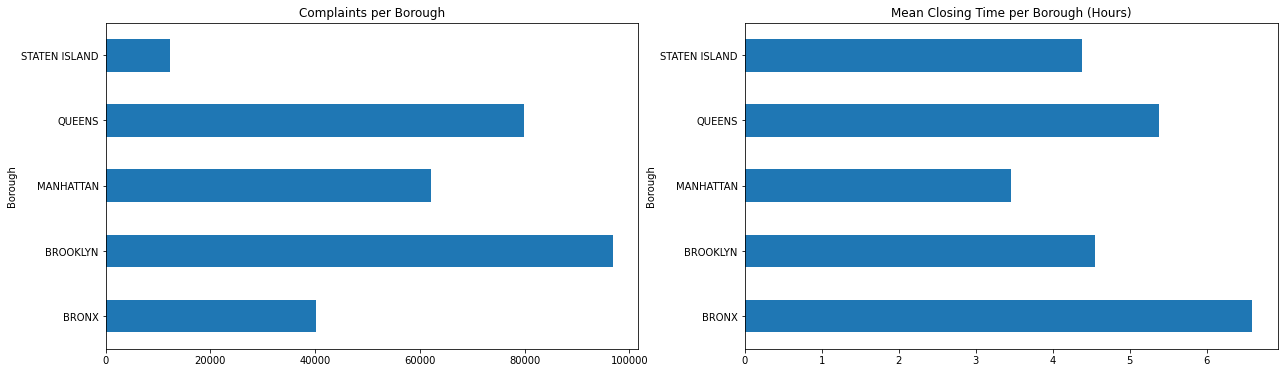

In [35]:
fig = plt.figure(figsize=(21,6))
plt.subplot(1, 2, 1)
data.groupby('Borough')['Unique Key'].size().plot(kind='barh',title='Complaints per Borough');

plt.subplot(1, 2, 2)
data.groupby('Borough')['Request_Closing_Hours'].mean().plot(kind='barh',title='Mean Closing Time per Borough (Hours)');
plt.show()

## Conclusion:

- Most complaints raised in May and September, while least in February.
- Highest number of complaints raised are of 'Blocked Driveway'.(28% of all the complaints)
- Second highest number of complaints are of Noice Complaints.(26% of all the complaints including both streetwalk and commercial complaints)
- Third highest number of complaints are of 'Illegal Parking'.(25% of all the complaints)

### Brooklyn:
- Raises the most number of complaints as of 33%.
- Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (60% of all complaints raised in Brooklyn)
- Around 30% of 'Animal Abuse' complaints are raised from Brooklyn alone.
- Complaints are closed in second best average closing time. (4.5 hours per complaint)

### Queens:
- Number of complaints are second highest at around 28%.
- As Brooklyn, Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (68% of all complaints raised in Queens)
- 40% of all 'Blocked Driveway' complaints are raised from Queens.
- 45% of all 'Derelict Vehicle' complaints are raised from Queens.
- Complaints are closed poorly, in average closing time of 5 hours.

### Manhattan:
- Number of complaints are around 20%.
- Mostly Noise related complaints. (55% including both streetwalk and commercial complaints)
- Complaints are closed in best closing time. (3.5 hours per complaint)

### Bronx:
- Number of Complaints around 13%.
- Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (55% of all complaints raised in Bronx)
- Complaints are closed in poorest closing time. (more than 6 hours per complaint)

### Staten Island:
- Lowest number of Complaints raised.(4%)
- Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (60% of all complaints raised in Staten Island)
- Complaints are closed in average closing time.(4.5 hours per complaint)

## Sol-5:  Hypothesis testing

### 1.  Whether the average response time across complaint types is similar or not (overall)

- First we will convert our hourly timedelta into minuted for more precise results.
- Below is the distribution of our Request_Closing_Minutes data for 'Noise - Street/Sidewalk' complaint type.
- We see a positive skewness in data if we limit the range to 1250
- As our data contains too many outliers , hence we will transform the data using log transformation

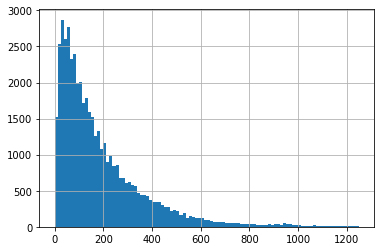

In [36]:
data['Request_Closing_Minutes'] = data['Request_Closing_Time'].astype('timedelta64[m]')+1

original = data[data['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Minutes']
original.hist(bins=100,range=(0,1250))

In [37]:
original.describe()

count    47748.000000
mean       207.237790
std        327.180293
min          3.000000
25%         61.000000
50%        133.000000
75%        259.000000
max      35573.000000
Name: Request_Closing_Minutes, dtype: float64

- When we look at above statistics, it becomes clear that we have very few but very large values after th 75th percentile.

- we will take the log of Request_Closing_Minutes for each complaint type and store in a dictionary.
- Log transformation removes the skewness from the data.

In [38]:
dataset = {}
for complaint in data['Complaint Type'].unique():
    dataset[complaint] = np.log(data[data['Complaint Type']==complaint]['Request_Closing_Minutes'])

In [39]:
dataset.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

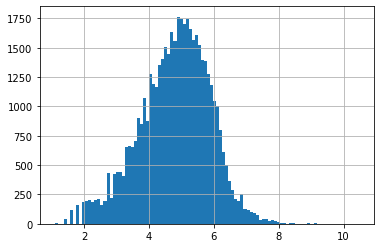

In [40]:
dataset['Noise - Street/Sidewalk'].hist(bins=100)

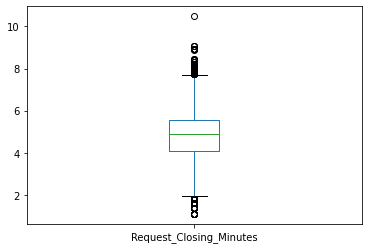

In [41]:
dataset['Noise - Street/Sidewalk'].plot(kind='box')

In [42]:
for complaint in dataset.keys():
    print(dataset[complaint].std())

1.0883569179983164
0.968942621211635
1.067164643764765
1.247250640294688
1.0740675807552482
1.1589202042209954
1.1947703475310807
1.0641925812925177
1.0360355296426127
1.0995431178584425
1.1702228606633116
1.0358383203301404
1.1061328713039125
1.0581967861803852
1.026822302225286


-  To conduct our hypothesis test, we will conduct an ANOVA (analysis of variance) test as we have to compare the means of more than two groups.
- Below conditions should be met before conducting ANOVA.
    1. All distributions must follow a normal distributions curve. We have verified this after the log transformation
    2. Standard deviation for all groups must be same. Above output proves that this is true.
    3. All samples are drawn independently of each other.

<br>
<br>
Now we will futher move on to defining hypothesis and critical values........

**Null Hypothesis:** Average response time for all the complaints type is same.

**Alternate Hypothesis:** Average response time for all the complaints type is not same and theres is some difference among the groups.

- Below We conduct ANOVA test for top 5 type of complaints
- For a 95% of confidence interval we choose our alpha as 0.05 for 5%
- Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

     **if p < alpha(0.05)** : Reject Null Hypothesis, Average response time for all the complaints type is not same.
     
     **if p > alpha(0.05)** : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [43]:
# import f_oneway from scipy.stats library
from scipy.stats import f_oneway

stat, p = f_oneway(dataset['Noise - Street/Sidewalk'],dataset['Blocked Driveway'],dataset['Illegal Parking'],dataset['Derelict Vehicle'],
                   dataset['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2455.140, p=0.000
Different distributions (reject H0)


- As our p-value is quite low , hence it is being converted to 0.0
- Since our p-value is lowere that our critical p-value, we will conclude that we have enogh evidence to reject pur Null Hypothesis and that

     **Average response time for all the complaints type is not same.**

### 2. Are the type of complaint or service requested and location related?

- To find the correlation between location and complaint types, we will consider below columns
    1. Complaint Type
    2. Borough
    3. City
    4. Longitude
    5. Latitude
    

In [44]:
sample = data[['Complaint Type','Borough','Longitude','Latitude','City']]

- Since Our data in Complaint Type, Borough and City is Categorical hence we can not directly apply corr() method.
- First we will convert the categorical data to numerical data by mapping the category to category codes

In [45]:
sample['Complaint Type'] = sample['Complaint Type'].cat.codes
sample['Borough'] = sample['Borough'].cat.codes
sample['City'] = sample['City'].cat.codes

In [46]:
sample.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,10,2,-73.923501,40.865682,33
1,1,3,-73.915094,40.775945,1
2,1,0,-73.888525,40.870325,6
3,6,0,-73.828379,40.835994,6
4,6,3,-73.874170,40.733060,13


In [47]:
sample.corr(method='pearson')

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.076829,-0.181765,0.170199,0.094489
Borough,-0.076829,1.000000,0.022142,-0.250843,0.718829
Longitude,-0.181765,0.022142,1.000000,0.368842,-0.119088
Latitude,0.170199,-0.250843,0.368842,1.000000,-0.004003
City,0.094489,0.718829,-0.119088,-0.004003,1.000000


- As we can see from above table, **there is no relationship between complaint type and location.**
- Which will be the general idea as in our data, most of the Complaint type are of 'Blocked Driveway' and 'Illegal Parking' which is common in all of the Boroughs.